# Data Retrieval

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# install sodapy package if it's not installed already
pip install sodapy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
# Load the dataset, change csv name when needed
csv_df = pd.read_csv('/content/DOHMH_New_York_City_Restaurant_Inspection_Results_20251207.csv',
                     quotechar='"', low_memory=False)
print(csv_df.shape)
print(csv_df.info())

(292727, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292727 entries, 0 to 292726
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CAMIS                  292727 non-null  int64  
 1   DBA                    292724 non-null  object 
 2   BORO                   292727 non-null  object 
 3   BUILDING               290648 non-null  object 
 4   STREET                 292711 non-null  object 
 5   ZIPCODE                289117 non-null  float64
 6   PHONE                  292720 non-null  object 
 7   CUISINE DESCRIPTION    288774 non-null  object 
 8   INSPECTION DATE        292727 non-null  object 
 9   ACTION                 288774 non-null  object 
 10  VIOLATION CODE         286499 non-null  object 
 11  VIOLATION DESCRIPTION  286499 non-null  object 
 12  CRITICAL FLAG          292727 non-null  object 
 13  SCORE                  276237 non-null  float64
 14  GRADE                  

In [4]:
# Source: NYC Open Data API example from https://dev.socrata.com/foundry/data.cityofnewyork.us/43nn-pn8j

#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofnewyork.us,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("43nn-pn8j", limit=2000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [5]:
# Modify example to get all rows
limit = 50000
offset = 0
all_results = []

while True:
    print(f"Getting rows {offset} - {offset + limit}")
    batch = client.get("43nn-pn8j", limit=limit, offset=offset)

    if not batch:
        print("Returned all data")
        break

    all_results.extend(batch)
    offset += limit

    if len(batch) < limit:
        print(f"Final batch ({len(batch)} rows)")
        break

df = pd.DataFrame.from_records(all_results)
print(df.shape)
print(df.info())

Getting rows 0 - 50000
Getting rows 50000 - 100000
Getting rows 100000 - 150000
Getting rows 150000 - 200000
Getting rows 200000 - 250000
Getting rows 250000 - 300000
Final batch (43401 rows)
(293401, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293401 entries, 0 to 293400
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   camis                        293401 non-null  object
 1   dba                          293401 non-null  object
 2   boro                         293401 non-null  object
 3   building                     291322 non-null  object
 4   street                       293385 non-null  object
 5   phone                        293394 non-null  object
 6   inspection_date              293401 non-null  object
 7   critical_flag                293401 non-null  object
 8   record_date                  293401 non-null  object
 9   zipcode                      289797 non-n

In [6]:
# remove computed columns that are not in CSV file
computed_cols = [col for col in df.columns if col.startswith(":@computed_region")]
df.drop(columns=computed_cols, inplace=True, errors='ignore')
# verify the shapes are the same in CSV vs. API
print(df.shape)

(293401, 27)


In [7]:
# Example data
print(f"Initial shape (Each row is a Restaurant Citations): {df.shape}")
print("Columns:", df.columns.tolist())
print(df.info())
print(df.head(3))

Initial shape (Each row is a Restaurant Citations): (293401, 27)
Columns: ['camis', 'dba', 'boro', 'building', 'street', 'phone', 'inspection_date', 'critical_flag', 'record_date', 'zipcode', 'latitude', 'longitude', 'community_board', 'council_district', 'census_tract', 'bin', 'bbl', 'nta', 'location', 'cuisine_description', 'action', 'violation_code', 'violation_description', 'score', 'inspection_type', 'grade', 'grade_date']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293401 entries, 0 to 293400
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   camis                  293401 non-null  object
 1   dba                    293401 non-null  object
 2   boro                   293401 non-null  object
 3   building               291322 non-null  object
 4   street                 293385 non-null  object
 5   phone                  293394 non-null  object
 6   inspection_date        293401 non-nu

# Data Cleaning

In [8]:
print("Missing Values % of overall")
print((df.isnull().mean() * 100).sort_values(ascending=False))

Missing Values % of overall
grade_date               53.670915
grade                    51.075150
score                     5.591324
violation_description     2.089632
violation_code            2.089632
bin                       1.949891
nta                       1.524876
community_board           1.524876
council_district          1.512265
census_tract              1.512265
cuisine_description       1.312879
inspection_type           1.312879
action                    1.312879
zipcode                   1.228353
location                  1.228353
bbl                       0.759711
building                  0.708587
latitude                  0.463189
longitude                 0.463189
street                    0.005453
phone                     0.002386
critical_flag             0.000000
record_date               0.000000
dba                       0.000000
camis                     0.000000
inspection_date           0.000000
boro                      0.000000
dtype: float64


In [9]:
# missing data info
print("Missing values (%):")
print((df.isna().sum() / len(df) * 100).sort_values(ascending=False))

Missing values (%):
grade_date               53.670915
grade                    51.075150
score                     5.591324
violation_description     2.089632
violation_code            2.089632
bin                       1.949891
nta                       1.524876
community_board           1.524876
council_district          1.512265
census_tract              1.512265
cuisine_description       1.312879
inspection_type           1.312879
action                    1.312879
zipcode                   1.228353
location                  1.228353
bbl                       0.759711
building                  0.708587
latitude                  0.463189
longitude                 0.463189
street                    0.005453
phone                     0.002386
critical_flag             0.000000
record_date               0.000000
dba                       0.000000
camis                     0.000000
inspection_date           0.000000
boro                      0.000000
dtype: float64


In [10]:
# determin columns type based on Columns in https://data.cityofnewyork.us/Health/DOHMH-New-York-City-Restaurant-Inspection-Results/43nn-pn8j/about_data
date_cols = ["inspection_date", "grade_date", "record_date"]

numeric_cols = ["score", "latitude", "longitude"]

text_cols = ["dba", "camis", "boro", "building", "street", "phone", "zipcode", "cuisine_description",
             "action", "violation_code", "violation_description", "critical_flag", "grade", "inspection_type",
             "community_board", "council_district", "census_tract", "nta", "location"]

In [11]:
# clean up invalid rows where BORO = 0 (not in NYC)
invalid_boro_count = (df["boro"] == "0").sum()
print(f"Rows with invalid BORO: {invalid_boro_count:,}")
df = df[df["boro"] != "0"].copy()
print(df.shape) #after clean up

Rows with invalid BORO: 16
(293385, 27)


In [12]:
# standardize date columns
for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors="coerce")
        print(f"Null in {col} after standardization: {df[col].isna().sum()}")

Null in inspection_date after standardization: 0
Null in grade_date after standardization: 157455
Null in record_date after standardization: 0


In [13]:
# create additional date columns for analysis
df["inspection_year"] = df["inspection_date"].dt.year
df["inspection_month"] = df["inspection_date"].dt.month
df["inspection_season"] = pd.cut(df["inspection_date"].dt.month,
    bins=[0, 2, 5, 8, 11, 12],
    labels=["Winter", "Spring", "Summer", "Fall", "Winter"],
    right=True,
    ordered=False)
print(df[["inspection_date", "inspection_year", "inspection_month", "inspection_season"]].head())

  inspection_date  inspection_year  inspection_month inspection_season
0      1900-01-01             1900                 1            Winter
2      1900-01-01             1900                 1            Winter
3      1900-01-01             1900                 1            Winter
4      1900-01-01             1900                 1            Winter
5      1900-01-01             1900                 1            Winter


In [14]:
from datetime import date

df["inspection_date"] = df["inspection_date"].dt.date

bad_dates = df[(df["inspection_date"] == date(1900, 1, 1))]
print(f"Rows with inspection_date = 1900-01-01: {len(bad_dates)}")
bad_dates.head()

Rows with inspection_date = 1900-01-01: 3836


,camis,dba,boro,building,street,phone,inspection_date,critical_flag,record_date,zipcode,...,action,violation_code,violation_description,score,inspection_type,grade,grade_date,inspection_year,inspection_month,inspection_season
0,50160484,BAOBAO SLIDER,Manhattan,W,59 STREET COLUMBUS CIRCLE,6466372137,1900-01-01,Not Applicable,2025-12-08 06:00:15,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1900,1,Winter
2,50157995,BROOKLYN DUMPLING SHOP,Queens,110-00,ROCKAWAY BOULEVARD,9172327900,1900-01-01,Not Applicable,2025-12-08 06:00:15,11420,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1900,1,Winter
3,50176674,GOLDEN STEAMER II INC.,Brooklyn,1964,86 STREET,6463749320,1900-01-01,Not Applicable,2025-12-08 06:00:15,11214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1900,1,Winter
4,50179018,MADRESS LLC,Brooklyn,348,NOSTRAND AVENUE,7184128112,1900-01-01,Not Applicable,2025-12-08 06:00:15,11216,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1900,1,Winter
5,50151904,PICA POLLO 809 EL ORIGINAL,Bronx,288,EAST BURNSIDE AVENUE,9089440006,1900-01-01,Not Applicable,2025-12-08 06:00:15,10457,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1900,1,Winter


In [15]:
df["record_date"] = df["record_date"].dt.date

same_dates = df[(df["inspection_date"] == date(1900, 1, 1)) &
                (df["record_date"] == date(2025, 10, 27))]
print(f"Rows with record_date = today : {len(same_dates)}")

# drop all the data today since inception date is invalid
df = df[df["inspection_date"] != date(1900, 1, 1)]
df.shape

Rows with record_date = today : 0


(289549, 30)

In [16]:
# clean up text columns
def clean_text(x):
    if pd.isna(x):
        return np.nan
    x = str(x).strip()  # remove leading/trailing spaces
    x = re.sub(r'\s+', ' ', x)  # remove multiple spaces
    x = re.sub(r'[^\w\s&\'/.\-]', '', x)  # remove special characters
    return x

for col in text_cols:
    if col in df.columns:
        before_unique = df[col].astype(str).nunique(dropna=True)
        df[col] = df[col].apply(clean_text)
        after_unique = df[col].astype(str).nunique(dropna=True)
        print(f"{col} reduced from {before_unique} to {after_unique}")

dba reduced from 21116 to 21103
camis reduced from 26753 to 26753
boro reduced from 5 to 5
building reduced from 8037 to 8037
street reduced from 1898 to 1897
phone reduced from 24484 to 24484
zipcode reduced from 220 to 220
cuisine_description reduced from 90 to 90
action reduced from 5 to 5
violation_code reduced from 151 to 151
violation_description reduced from 227 to 207
critical_flag reduced from 3 to 3
grade reduced from 7 to 7
inspection_type reduced from 34 to 34
community_board reduced from 69 to 69
council_district reduced from 52 to 52
census_tract reduced from 1176 to 1176
nta reduced from 194 to 194
location reduced from 22569 to 22569


In [17]:
# Save clean data
df.to_csv("data_clean.csv", index=False)

# Data Analysis

## Exploratory Data Analysis (EDA)

In [18]:
num_restaurants = df["camis"].nunique()
print(f"Number of unique restaurants: {num_restaurants}")

Number of unique restaurants: 26753


In [19]:
restaurants_per_boro = df.groupby("boro")["camis"].nunique().sort_values(ascending=False)
print(f"Number of unique restaurants per borough: {restaurants_per_boro}")

Number of unique restaurants per borough: boro
Manhattan        10430
Brooklyn          6846
Queens            6149
Bronx             2348
Staten Island      980
Name: camis, dtype: int64


In [20]:
inspections_per_boro = df.groupby("boro")["camis"].count().sort_values(ascending=False)
print(f"Number of inspections per borough: {inspections_per_boro}")

Number of inspections per borough: boro
Manhattan        106898
Brooklyn          74260
Queens            71841
Bronx             26655
Staten Island      9895
Name: camis, dtype: int64


In [21]:
cuisine_counts = df.groupby("cuisine_description")["camis"].count()
top10_cuisines = cuisine_counts.sort_values(ascending=False).head(10)
print(f"Top 10 cuisine types by number of inspections: {top10_cuisines}")

Top 10 cuisine types by number of inspections: cuisine_description
American                    45426
Chinese                     28922
Coffee/Tea                  20419
Pizza                       17332
Latin American              13621
Mexican                     12077
Bakery Products/Desserts    11377
Caribbean                   11052
Japanese                    10355
Italian                      9602
Name: camis, dtype: int64


## Borough-level Comparison: How do food safety results differ in the five boroughs?

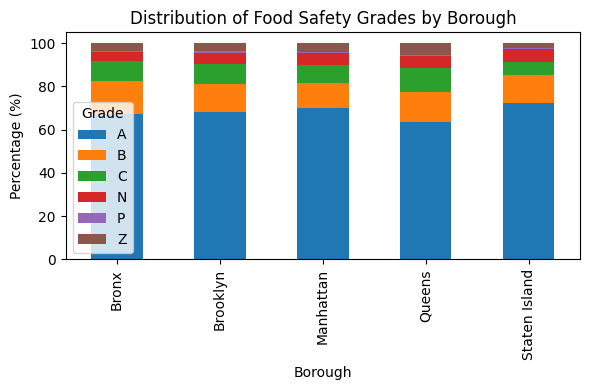

In [22]:
# Compare letter grade distribution
grade_dist = (df.groupby("boro")["grade"].value_counts(normalize=True)
      .rename("%").mul(100).round(1).reset_index())

pivot_df = grade_dist.pivot(index="boro", columns="grade", values="%").fillna(0)

pivot_df = pivot_df.reindex(sorted(pivot_df.columns), axis=1)

pivot_df.plot(kind="bar", stacked=True, figsize=(6, 4))

plt.title("Distribution of Food Safety Grades by Borough")
plt.xlabel("Borough")
plt.ylabel("Percentage (%)")
plt.legend(title="Grade")
plt.tight_layout()
plt.show()

This graph reveals that Queens has the lowest percentage of A ratings and also the highest percentage of ungraded restaurants. This is surprising since from the exploratory analysis earlier, Manhattan has the highest number of restaurants and inspections, followed by Brooklyn, then Queens.

In terms of demographic data from https://popfactfinder.planning.nyc.gov/explorer/cities/NYC, Queens has the second-highest population, following Brooklyn among the five boroughs. However, it also has the second-highest median age (39.1 years vs. 36.8 years for NYC). Queens is also widely viewed as the most culturally diverse county in the U.S., and the combination of high median age and population indicates that Queens might have a higher number of small, independent, immigrant-owned restaurants. These establishments often operate in older, smaller kitchens, which could contribute to the lowest percentage of A rating.

In [23]:
# Compare critical vs. non-critical violation distribution
critical_flag_summary = (df.groupby("boro")["critical_flag"].value_counts(normalize=True)
     .rename("%").mul(100).round(1).reset_index())

print("Critical flag distribution by borough:")
print(critical_flag_summary)

Critical flag distribution by borough:
             boro   critical_flag     %
0           Bronx        Critical  52.9
1           Bronx    Not Critical  46.0
2           Bronx  Not Applicable   1.1
3        Brooklyn        Critical  53.9
4        Brooklyn    Not Critical  44.8
5        Brooklyn  Not Applicable   1.3
6       Manhattan        Critical  52.8
7       Manhattan    Not Critical  45.6
8       Manhattan  Not Applicable   1.7
9          Queens        Critical  54.2
10         Queens    Not Critical  44.5
11         Queens  Not Applicable   1.3
12  Staten Island        Critical  55.4
13  Staten Island    Not Critical  43.9
14  Staten Island  Not Applicable   0.7


Looking within the violation, all boroughs have around 52-54% of critical (violations are those most likely to contribute to food-borne illness) vs. non-critical violations, so it does not appear that a specific borough has worse violations.

In [24]:
# Count violations per inspection event
violations_per_inspection = (df.groupby(["boro", "camis", "inspection_date"]).size()
      .groupby("boro").mean().round(2))

print("Average number of violations per inspection:")
print(violations_per_inspection)


Average number of violations per inspection:
boro
Bronx            3.47
Brooklyn         3.40
Manhattan        3.38
Queens           3.68
Staten Island    3.24
dtype: float64


When looking at how many violations are issued per inspection on average, Queens also has the highest average number of violations. This is consistent with previous analysis that shows Queens has the lowest percentage of A ratings.

## Violation patterns: Do restaurants generally improve after multiple inspections?

In [25]:
# only keep restaurants with grades and convert A/B/C to numeric scores for comparison
df['valid_grade'] = (df['grade'].astype(str).str.upper().str.strip())
valid_grades = {'A', 'B', 'C'}
df_clean = df[df['valid_grade'].isin(valid_grades)].copy()

grade_map = {'A': 1, 'B': 2, 'C': 3}
df_clean['grade_numeric'] = df_clean['valid_grade'].map(grade_map)

In [26]:
# order inspections per restaurant to measure improvement
df_clean = df_clean.sort_values(['camis', 'inspection_date'])
df_clean['inspection_num'] = df_clean.groupby('camis').cumcount() + 1

In [27]:
# Compute grade difference between two consecutive inspections

# shift grade by previous inspection
df_clean['prev_grade_numeric'] = df_clean.groupby('camis')['grade_numeric'].shift(1)

# compute grade change
df_clean['grade_change'] = df_clean['grade_numeric'] - df_clean['prev_grade_numeric']

# keep only rows with a previous inspection
df_change = df_clean.dropna(subset=['prev_grade_numeric']).copy()

print(df_change[['camis', 'inspection_num', 'prev_grade_numeric', 'grade_numeric', 'grade_change']].head())


           camis  inspection_num  prev_grade_numeric  grade_numeric  \
107870  30075445               2                 1.0              1   
130959  30075445               3                 1.0              1   
28840   30075445               4                 1.0              1   
91502   30075445               5                 1.0              1   
172270  30075445               6                 1.0              1   

        grade_change  
107870           0.0  
130959           0.0  
28840            0.0  
91502            0.0  
172270           0.0  


In [28]:
# compute grade change, negative difference = improvement (C->A = 1-3 = -2)
df_change['change_category'] = df_change['grade_change'].apply(lambda n: 'Improved' if n < 0 else ('Declined' if n > 0 else 'No change'))

# change in percentage
improvement_pct = (df_change['change_category'].value_counts(normalize=True)
    .rename("%").mul(100).round(1).reset_index())

print(improvement_pct)

  change_category     %
0       No change  95.1
1        Improved   2.9
2        Declined   2.0


The analysis here only looks at restaurants that have consecutive inspection visits to see if inspection grade improves and declines after the initial visit. Surprisingly, most restaurants stay the same, with a small number of restaurants improved and an even smaller portion declined.

## Cuisine-specific analysis: Are some cuisines more likely to receive critical violations or bad grades?

In [29]:
# Critical violation distribution by cuisine
crit_rate = (df.assign(is_critical=lambda x: (x['critical_flag'] == 'Critical'))
        .groupby('cuisine_description')['is_critical'].mean().mul(100).round(1)
        .reset_index().rename(columns={'is_critical': 'critical %'}))
top_crit_cuis = crit_rate.sort_values("critical %", ascending=False)
print(top_crit_cuis.head(15))

   cuisine_description  critical %
26               Czech        73.3
8          Bangladeshi        60.3
24              Creole        60.0
23         Continental        58.3
21    Chinese/Japanese        58.1
20       Chinese/Cuban        58.1
44              Indian        58.0
64           Pakistani        57.9
1              African        57.8
80     Southeast Asian        57.7
19             Chinese        57.4
68              Polish        57.4
59        New American        57.3
86                Thai        56.7
4   Asian/Asian Fusion        56.7


In [30]:
# Bad grade (below A) distribution by cuisine
valid_grades = df[df['grade'].isin(['A', 'B', 'C'])].copy()

bad_rate = (valid_grades.assign(is_bad=lambda x: x['grade'].isin(['B', 'C']))
        .groupby('cuisine_description')['is_bad'].mean().mul(100).round(1)
        .reset_index().rename(columns={'is_bad': 'bad grade %'}))
top_bad_cuis = bad_rate.sort_values("bad grade %", ascending=False)
print(top_bad_cuis.head(15))

   cuisine_description  bad grade %
32            Filipino         65.7
8          Bangladeshi         61.9
24              Creole         61.3
64           Pakistani         55.4
1              African         54.1
44              Indian         46.9
10              Basque         46.7
20       Chinese/Cuban         42.7
21    Chinese/Japanese         41.4
86                Thai         40.6
66            Peruvian         38.7
17             Chilean         38.5
36              Fusion         38.2
80     Southeast Asian         37.8
35   Fruits/Vegetables         37.5


In [31]:
# Merge both measurement together into one table
cuisine_summary = (crit_rate.merge(bad_rate, on='cuisine_description', how='outer').fillna(0))
cuisine_summary = cuisine_summary.sort_values('bad grade %', ascending=False)
print(cuisine_summary.head(20))

   cuisine_description  critical %  bad grade %
32            Filipino        55.9         65.7
8          Bangladeshi        60.3         61.9
24              Creole        60.0         61.3
64           Pakistani        57.9         55.4
1              African        57.8         54.1
44              Indian        58.0         46.9
10              Basque        46.8         46.7
20       Chinese/Cuban        58.1         42.7
21    Chinese/Japanese        58.1         41.4
86                Thai        56.7         40.6
66            Peruvian        56.2         38.7
17             Chilean        47.2         38.5
36              Fusion        53.7         38.2
80     Southeast Asian        57.7         37.8
35   Fruits/Vegetables        43.1         37.5
15           Caribbean        53.3         37.0
19             Chinese        57.4         36.8
4   Asian/Asian Fusion        56.7         36.4
53      Latin American        55.0         35.5
82             Spanish        56.0      

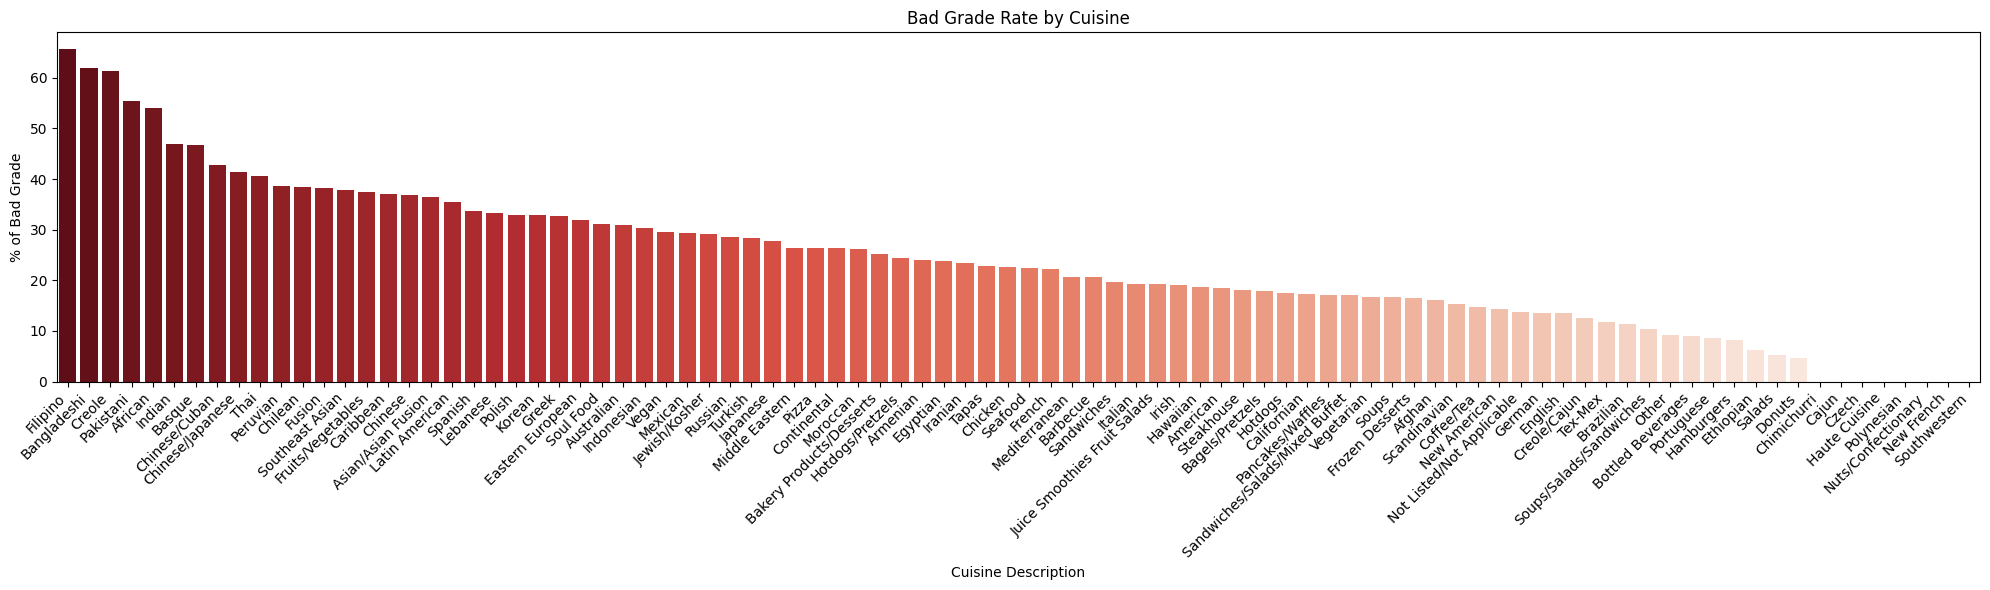

In [32]:
# Plot cuisine bad grade analysis
crit_rate_sorted = bad_rate.sort_values("bad grade %", ascending=False)

plt.figure(figsize=(20,6))
sns.barplot(
    data=crit_rate_sorted,
    x="cuisine_description",
    y="bad grade %",
    hue="cuisine_description",
    palette="Reds_r"
)
plt.xticks(rotation=45, ha='right')
plt.ylabel("% of Bad Grade")
plt.xlabel("Cuisine Description")
plt.title("Bad Grade Rate by Cuisine")
plt.tight_layout()
plt.show()


In [33]:
print(df[df['cuisine_description']=='Czech'])

           camis                          dba    boro building     street  \
5391    40812870                       KOLIBA  Queens    31-11  23 AVENUE   
14398   41485121  BOHEMIAN HALL & BEER GARDEN  Queens    29-19  24 AVENUE   
36793   41485121  BOHEMIAN HALL & BEER GARDEN  Queens    29-19  24 AVENUE   
41784   40812870                       KOLIBA  Queens    31-11  23 AVENUE   
52008   40812870                       KOLIBA  Queens    31-11  23 AVENUE   
60392   41485121  BOHEMIAN HALL & BEER GARDEN  Queens    29-19  24 AVENUE   
77434   41485121  BOHEMIAN HALL & BEER GARDEN  Queens    29-19  24 AVENUE   
139286  40812870                       KOLIBA  Queens    31-11  23 AVENUE   
154672  41485121  BOHEMIAN HALL & BEER GARDEN  Queens    29-19  24 AVENUE   
168046  41485121  BOHEMIAN HALL & BEER GARDEN  Queens    29-19  24 AVENUE   
244402  41485121  BOHEMIAN HALL & BEER GARDEN  Queens    29-19  24 AVENUE   
253290  41485121  BOHEMIAN HALL & BEER GARDEN  Queens    29-19  24 AVENUE   

In this analysis, bad grade % shows the percentage of restaurants that have grades below A in a specific cuisine, while critical % shows the percentage of restaurants that receive critical violations. Interestingly, it's possible for a restaurant to receive a critical violation but still receive an A rating. For example, Czech restaurants have the highest percentage of critical violations, yet all the restaurants have A ratings. This might be due to it having a small sample size (only 15 restaurants in the whole city).

However, this raises an interesting question for customers: Is an A rating a reliable indicator of whether a restaurant can achieve this even with critical violations (as a reminder, critical violations are those most likely to contribute to food-borne illness)? Therefore, this analysis combines both metrics for the audience to understand and weigh in on their preference.


## Seasonality: Are there seasonal or holiday-related spikes in food safety violations?

In [34]:
# Group by season
df['is_critical'] = df['critical_flag'].str.upper() == 'CRITICAL'
seasonal_summary = (
    df.groupby('inspection_season')['is_critical'].mean().mul(100).round(1)
      .reset_index().rename(columns={'is_critical': 'critical %'})
      .sort_values(by='critical %', ascending=False))

print(seasonal_summary)

  inspection_season  critical %
2            Summer        54.2
0              Fall        53.8
1            Spring        53.1
3            Winter        52.9


/tmp/ipython-input-1283533020.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('inspection_season')['is_critical'].mean().mul(100).round(1)


In [35]:
# Count of inspections by season
season_counts = (df.groupby('inspection_season')['inspection_date']
      .count().reset_index().rename(columns={'inspection_date': 'inspection_count'}))
season_counts = season_counts.sort_values('inspection_count', ascending=False)
print(season_counts)

  inspection_season  inspection_count
1            Spring             77521
0              Fall             76936
2            Summer             71646
3            Winter             63446


/tmp/ipython-input-2056210376.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_counts = (df.groupby('inspection_season')['inspection_date']


Despite spring being the season with the highest inspection count, summer has the highest percentage of restaurants receiving critical violations, and winter has the lowest percentage.

This is most likely due to food spoilage is very sensitive to temperature, and higher summer temperatures can accelerate spoilage if food is not stored properly.